[View in Colaboratory](https://colab.research.google.com/github/gideonmanurung/MLBootCamp/blob/master/Toxic_Comment_Classification_Challenge_Starter_Colab_Notebook.ipynb)

# Toxic Comment Classification Challenge: Starter Colab Notebook

leduykhanh@

Short Link: **tiny.cc/mlcc-toxic-starter-colab**

Kaggle challenge: https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge


>[Toxic Comment Classification Challenge: Starter Colab Notebook](#scrollTo=SXgAs6uoQ_Zv&forceEdit=true&offline=true&sandboxMode=true)

>>[Import the dataset](#scrollTo=pdQHcSnWdM4b&forceEdit=true&offline=true&sandboxMode=true)

>>[Input and Label](#scrollTo=rkGUNgjocwKi&forceEdit=true&offline=true&sandboxMode=true)

>>[Train/Validation Split](#scrollTo=qaUp1VaFek9e&forceEdit=true&offline=true&sandboxMode=true)

>>[Train a model](#scrollTo=7C1075_ce57W&forceEdit=true&offline=true&sandboxMode=true)

>>[References](#scrollTo=7C1075_ce57W&forceEdit=true&offline=true&sandboxMode=true)



## Import the dataset

In [1]:
# Original data belongs to https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data
! wget https://www.dropbox.com/s/ggl9krhh6dcwhhz/train.csv

--2018-10-12 03:41:51--  https://www.dropbox.com/s/ggl9krhh6dcwhhz/train.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.1, 2620:100:6019:1::a27d:401
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ggl9krhh6dcwhhz/train.csv [following]
--2018-10-12 03:41:51--  https://www.dropbox.com/s/raw/ggl9krhh6dcwhhz/train.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc8bb38f78d332e131b0b58b3d2.dl.dropboxusercontent.com/cd/0/inline/ASyLquwMsuoNqZKo_yBHQIqAaXSSs53l8cgzMF_YjjwVco0fpGqRFC5leEwc2JfPf36IHN3b6lRzGrU9NKYnEUYHzo46axUzf2gTzcwLsBlulo09y_6D4QM6UhvQeU5cCJ32uF0hfx54HHumdbkqGInIr4JtPcb7bNJtc6u0kflF7CZ-4f6HChpI5WQ7VRwPMN4M-ApaLVR1wqkBmsxbVb4W/file [following]
--2018-10-12 03:41:51--  https://ucc8bb38f78d332e131b0b58b3d2.dl.dropboxusercontent.com/cd/0/inline/ASyLquwMsuoNqZKo_yBHQIqAaXSSs53l8cgzMF_

In [2]:
! ls -ls train.csv

67196 -rw-r--r-- 1 root root 68802655 Oct 12 03:41 train.csv


In [0]:
import pandas as pd
import numpy as np
data = pd.read_csv("train.csv")

## Input and Label

Input: "comment_text"

Label: "toxic"

In [0]:
dataset = data[ ["comment_text", "toxic"] ]

In [0]:
def standardizetext(df, textfield):
    df[textfield] = df[textfield].str.replace(r"http\S+", "")
    df[textfield] = df[textfield].str.replace(r"http", "")
    df[textfield] = df[textfield].str.replace(r"@\S+", "")
    df[textfield] = df[textfield].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df[textfield] = df[textfield].str.replace(r"@", "at")
    df[textfield] = df[textfield].str.lower()
    return df

In [24]:
dataset.fillna('_NA_')
dataset = standardizetext(dataset, "comment_text")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

## Train/Validation Split

In [0]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
kf.get_n_splits(dataset)
KFold(n_splits=10, random_state=None, shuffle=False)
for train_index, test_index in kf.split(dataset):
  data, data_test = dataset["comment_text"][train_index], dataset["comment_text"][test_index]
  target, target_test = dataset["toxic"][train_index], dataset["toxic"][test_index]

In [0]:
kf = KFold(n_splits=10)
kf.get_n_splits(data)
KFold(n_splits=10, random_state=None, shuffle=False)
for train_index, val_index in kf.split(data):
  data_train, data_val = data[train_index], data[val_index]
  target_train, target_val = target[train_index], target[val_index]

In [0]:
column = ["comment_text"]
data_train = pd.DataFrame(data_train,columns=column)

In [0]:
column = ["comment_text"]
data_val = pd.DataFrame(data_val,columns=column)

In [0]:
column = ["comment_text"]
data_test = pd.DataFrame(data_test,columns=column)

In [30]:
print(len(data_train))
print(len(data_val))
print(len(data_test))

129253
14361
15957


In [31]:
data_train.describe()

,comment_text
count,129253
unique,129198
top,
freq,3


In [32]:
data_val.describe()

,comment_text
count,14361
unique,14360
top,(second level warning)
freq,2


In [33]:
data_test.describe()

,comment_text
count,15957
unique,15957
top,"""\nthere may be a point in there about categor..."
freq,1


In [34]:
data_train.head(10)

,comment_text
0,explanation\nwhy the edits made under my usern...
1,d'aww! he matches this background colour i'm s...
2,"hey man, i'm really not trying to edit war it..."
3,"""\nmore\ni can't make any real suggestions on ..."
4,"you, sir, are my hero any chance you remember..."
5,"""\n\ncongratulations from me as well, use the ..."
6,cocksucker before you piss around on my work
7,your vandalism to the matt shirvington article...
8,sorry if the word 'nonsense' was offensive to ...
9,alignment on this subject and which are contra...


In [35]:
data_val.head(10)

,comment_text
129253,ok well then re word what i wrote so that it d...
129254,""" """"myth of diversity """" skookum take a lo..."
129255,troll attack\ncan you please help defend me ag...
129256,recommend article for deletion \n\nwhat it say...
129257,"""\n\nfor starters, i would avoid a name that i..."
129258,do you think that you get to make whatever you...
129259,"""\n\n i think you were right \n\n to be c..."
129260,known for money laundering \n\nd'souza is so w...
129261,i'm only reverting because others are revertin...
129262,redirect talk that's how we women are


## Train a model

Your model's code start here. All the best :)



## References

* Example of Estimator for DNN-based text classification https://github.com/tensorflow/tensorflow/blob/master/tensorflow/examples/learn/text_classification.py

* How to build a simple text classifier with TF-Hub https://www.tensorflow.org/tutorials/text_classification_with_tf_hub

* Tensorflow Estimator API: https://www.tensorflow.org/tutorials/recurrent

* Using pre-trained word embeddings in a Keras model https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html

* Text Classification with TensorFlow Estimators http://ruder.io/text-classification-tensorflow-estimators/

* Scikit-Learns NLP documentation: http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

* [Review on  Kaggle Toxic Comment Classification Challenge](https://medium.com/the-artificial-impostor/review-kaggle-toxic-comment-classification-challenge-part-1-934447339309)


In [36]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(data_train["comment_text"])
X_train_counts.shape

(129253, 154655)

In [37]:
count_vect = CountVectorizer()
X_test_counts = count_vect.fit_transform(data_test["comment_text"])
X_test_counts.shape

(15957, 46095)

In [38]:
count_vect = CountVectorizer()
X_val_counts = count_vect.fit_transform(data_val["comment_text"])
X_val_counts.shape

(14361, 43471)

In [39]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_train_tf = X_train_tf[:,-30000:]
X_train_tf.shape

(129253, 30000)

In [40]:
tf_transformer = TfidfTransformer(use_idf=False).fit(X_test_counts)
X_test_tf = tf_transformer.transform(X_test_counts)
X_test_tf = X_test_tf[:,-30000:]
X_test_tf.shape

(15957, 30000)

In [41]:
tf_transformer = TfidfTransformer(use_idf=False).fit(X_val_counts)
X_val_tf = tf_transformer.transform(X_val_counts)
X_val_tf = X_val_tf[:,-30000:]
X_val_tf.shape

(14361, 30000)

In [0]:
from sklearn.linear_model import LogisticRegression 

In [0]:
classifier = LogisticRegression(solver='sag', C=10)

In [44]:
classifier.fit(X_train_tf, target_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='sag', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
y_pred = classifier.predict(X_test_tf)

In [0]:
y_pred_prob = classifier.predict_proba(X_test_tf)[:, 1]

In [0]:
from sklearn import metrics
auc_score = metrics.roc_auc_score(target_test, y_pred_prob)

In [48]:
print("CV ROC_AUC score {}\n".format(auc_score))

CV ROC_AUC score 0.44320524053044497



In [0]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline

In [0]:
text_clf_svm = Pipeline([('vect', CountVectorizer()),
                         ('tfidf', TfidfTransformer()),
                         ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',
                                                   alpha=1e-3, n_iter=5, random_state=42)),
                        ])

In [51]:
_ = text_clf_svm.fit(data_train["comment_text"], target_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [0]:
predicted_svm = text_clf_svm.predict(data_test["comment_text"])

In [0]:
from sklearn import metrics
auc_score = metrics.roc_auc_score(target_test, predicted_svm)

In [54]:
print("CV ROC_AUC score {}\n".format(auc_score))

CV ROC_AUC score 0.5573558003888529



In [55]:
from keras import models
from keras import layers
import keras as K

Using TensorFlow backend.


In [0]:
def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc

In [56]:
model = models.Sequential()
# Input - Layer
model.add(layers.Dense(50, activation = "relu", input_shape=(30000, )))
# Hidden - Layers
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
# Output- Layer
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()
# compiling the model
model.compile(
 optimizer = "adam",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                1500050   
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 1,505,201
Trainable params: 1,505,201
Non-trainable params: 0
_________________________________________________________________


In [57]:
results = model.fit(
 X_train_tf, target_train,
 epochs= 5,
 batch_size = 32,
 validation_data = (X_val_tf, target_val)
)

Train on 129253 samples, validate on 14361 samples
Epoch 1/5
129253/129253 [==============================] - 157s 1ms/step - loss: 0.2370 - acc: 0.9155 - val_loss: 0.4919 - val_acc: 0.9050
Epoch 2/5
129253/129253 [==============================] - 155s 1ms/step - loss: 0.2114 - acc: 0.9223 - val_loss: 0.6940 - val_acc: 0.9045
Epoch 3/5
129253/129253 [==============================] - 157s 1ms/step - loss: 0.2016 - acc: 0.9257 - val_loss: 0.7768 - val_acc: 0.9047
Epoch 4/5
129253/129253 [==============================] - 156s 1ms/step - loss: 0.1936 - acc: 0.9294 - val_loss: 1.0253 - val_acc: 0.9038
Epoch 5/5
129253/129253 [==============================] - 154s 1ms/step - loss: 0.1879 - acc: 0.9309 - val_loss: 1.1171 - val_acc: 0.9039


In [0]:
y_prediction = model.predict(X_test_tf)
auc_score = metrics.roc_auc_score(target_test, y_prediction)

In [59]:
print("CV ROC_AUC score {}\n".format(auc_score))

CV ROC_AUC score 0.5802527040166987



In [0]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
train_input_fn = tf.estimator.inputs.pandas_input_fn(data_train, target_train, num_epochs=None, shuffle=True)

In [0]:
predict_val_input_fn = tf.estimator.inputs.pandas_input_fn(data_val, target_val, shuffle=False)

In [0]:
predict_test_input_fn = tf.estimator.inputs.pandas_input_fn(data_test, target_test, shuffle=False)

In [63]:
embedded_text_feature_column = hub.text_embedding_column(
    key="comment_text", 
    module_spec="https://tfhub.dev/google/nnlm-en-dim128/1")

INFO:tensorflow:Using /tmp/tfhub_modules to cache modules.


In [68]:
estimator = tf.estimator.DNNClassifier(
    hidden_units=[500, 300 , 150],
    feature_columns=[embedded_text_feature_column],
    n_classes=2,
    optimizer=tf.train.AdagradOptimizer(learning_rate=0.001))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp7z6p_og4', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f5207588198>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [72]:
estimator.train(input_fn=train_input_fn, steps=2000);

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp7z6p_og4/model.ckpt-700
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 700 into /tmp/tmp7z6p_og4/model.ckpt.
INFO:tensorflow:loss = 14.621235, step = 701
INFO:tensorflow:global_step/sec: 29.2019
INFO:tensorflow:loss = 27.702679, step = 801 (3.426 sec)
INFO:tensorflow:global_step/sec: 30.6017
INFO:tensorflow:loss = 16.451668, step = 901 (3.268 sec)
INFO:tensorflow:global_step/sec: 30.0307
INFO:tensorflow:loss = 33.302177, step = 1001 (3.333 sec)
INFO:tensorflow:global_step/sec: 30.4274
INFO:tensorflow:loss = 14.317971, step = 1101 (3.283 

In [70]:
train_eval_result = estimator.evaluate(input_fn=predict_val_input_fn)
test_eval_result = estimator.evaluate(input_fn=predict_test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-12-09:01:59
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp7z6p_og4/model.ckpt-700
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-10-12-09:02:03
INFO:tensorflow:Saving dict for global step 700: accuracy = 0.940603, accuracy_baseline = 0.9059954, auc = 0.93146485, auc_precision_recall = 0.72227424, average_loss = 0.16133112, global_step = 700, label/mean = 0.094004594, loss = 20.50333, precision = 0.76020944, prediction/mean = 0.103071615, recall = 0.5377778
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 700: /tmp/tmp7z6p_og4/model.ckpt-700
INFO:tensorflow:Ca

In [67]:
print("Training set accuracy: {accuracy}".format(**train_eval_result))
print("Test set accuracy: {accuracy}".format(**test_eval_result))

Training set accuracy: 0.9417867660522461
Test set accuracy: 0.9434103965759277


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpgaolpjkf/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


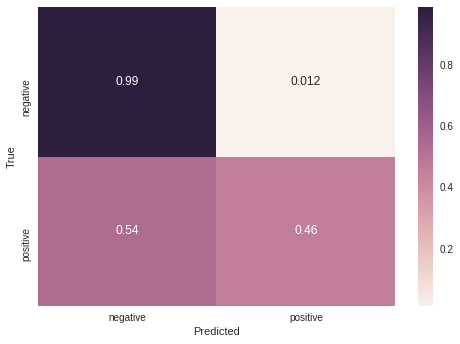

In [81]:
def get_predictions(estimator, input_fn):
  return [x["class_ids"][0] for x in estimator.predict(input_fn=input_fn)]

LABELS = [
    "negative", "positive"
]

# Create a confusion matrix on training data.
with tf.Graph().as_default():
  cm = tf.confusion_matrix(target_test, 
                           get_predictions(estimator, predict_test_input_fn))
  with tf.Session() as session:
    cm_out = session.run(cm)

# Normalize the confusion matrix so that each row sums to 1.
cm_out = cm_out.astype(float) / cm_out.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_out, annot=True, xticklabels=LABELS, yticklabels=LABELS);
plt.xlabel("Predicted");
plt.ylabel("True");

In [0]:
prediction = estimator.predict(data_test)

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import os

In [0]:
BASE_DIR = ''
MAX_NB_WORDS = 100
EMBEDDING_DIM = 100
MAX_SEQUENCE_LENGTH = 8000
GLOVE_DIR = os.path.join(BASE_DIR)

In [70]:
tokenizer = Tokenizer(nb_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(data_train["comment_text"])
sequences = tokenizer.texts_to_sequences(data_train["comment_text"])

/usr/local/lib/python3.6/dist-packages/keras/preprocessing/text.py:172: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


In [71]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 184393 unique tokens.


In [0]:
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [88]:
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', target_train.shape)

Shape of data tensor: (129253, 4000)
Shape of label tensor: (129253,)


In [89]:
embeddings_index = {}
f = open(os.path.join(GLOVE_DIR, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 68385 word vectors.


In [94]:
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

ValueError: ignored

In [0]:
x_train = data[:-nb_validation_samples]
y_train = labels[:-nb_validation_samples]
x_val = data[-nb_validation_samples:]
y_val = labels[-nb_validation_samples:]

In [0]:
x_transform_test = vocab_processor.transform(data_test["comment_text"])

In [0]:
x_transform_val = vocab_processor.transform(data_val["comment_text"])

In [0]:
x_train = np.array(list(x_transform_train))
x_test = np.array(list(x_transform_test))
x_val = np.array(list(x_transform_val))

In [153]:
n_words = len(vocab_processor.vocabulary_)
print('Total words: %d' % n_words)

Total words: 171684


In [155]:
model_fn = rnn_model
x_train -= 1
x_test -= 1
model_fn = bag_of_words_model
classifier = tf.estimator.Estimator(model_fn=model_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp28ncc07i', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f4ad70be7f0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [158]:
train_input_fn = tf.estimator.inputs.numpy_input_fn(
      x={WORDS_FEATURE: x_train},
      y=target_train,
      batch_size=len(x_train),
      num_epochs=100,
      shuffle=True)
classifier.train(input_fn=train_input_fn, steps=100)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp28ncc07i/model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 100 into /tmp/tmp28ncc07i/model.ckpt.
INFO:tensorflow:loss = 0.05883699, step = 101
INFO:tensorflow:Saving checkpoints for 200 into /tmp/tmp28ncc07i/model.ckpt.
INFO:tensorflow:Loss for final step: 0.02278533.


In [0]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(x={WORDS_FEATURE: x_test}, y=target_test, num_epochs=1, shuffle=False)
predictions = classifier.predict(input_fn=test_input_fn)

In [162]:
test_input_fn

<function tensorflow.python.estimator.inputs.numpy_io.numpy_input_fn.<locals>.input_fn>